# TP OpenMP - October 2022
## Part 1 : Pi
### Compilation

In [ ]:
# specify number of threads
#!export OMP NUM THREADS=2 ; ./prog

In [26]:
!g++ -o bin/tp_openmp_part_1_pi_critical tp_openmp_part_1_pi_critical.cpp -fopenmp -O3 -march=native

In [2]:
!g++ -o tp_openmp_part_1_pi_impl_reduce tp_openmp_part_1_pi_impl_reduce.cpp -fopenmp -O3 -march=native
!g++ -o tp_openmp_part_1_pi_impl_atomic tp_openmp_part_1_pi_impl_atomic.cpp -fopenmp -O3 -march=native

g++: error: tp_openmp_part_1_pi_impl_reduce.cpp: Aucun fichier ou dossier de ce type
g++: fatal error: no input files
compilation terminated.
g++: error: tp_openmp_part_1_pi_impl_atomic.cpp: Aucun fichier ou dossier de ce type
g++: fatal error: no input files
compilation terminated.


### Performance evaluation

In [27]:
# global vars
csv_result_file = "stats.csv"
csv_headers = {
    'version': str,
    'nb_threads': int,
    'num_steps' : int,
    'runtime' : float
}
color_num_steps = {
    100000 : "blue", 
    10000000 : "red", 
    1000000000 : "green",}
    #100000000000 : "black"}
num_steps = [list(color_num_steps.keys())[0]]
nb_threads = [1, 2, 4, 8]
repeats = range(0,10)

In [28]:
import os
import subprocess

try:
    os.remove(csv_result_file)
except OSError:
    pass

# create csv file
f = open(csv_result_file, "w")
f.write(",".join(csv_headers.keys()) + "\n")
f.close()

# exec
for nsteps in num_steps:
    for nb_thread in nb_threads:
        for repeat in repeats:
            args = ("./bin/tp_openmp_part_1_pi_critical", "-T", str(nb_thread), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()
            
            # args = ("./bin/tp_openmp_part_1_pi_impl_reduce", "-T", str(nb_thread), "-N", str(nsteps))
            # popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            # popen.wait()

            # args = ("./bin/tp_openmp_part_1_pi_impl_atomic", "-T", str(nb_thread), "-N", str(nsteps))
            # popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            # popen.wait()



### Performance analysis
#### Weak scaling

,version,nb_threads,num_steps,runtime
0,critical,1,100000,0.001357
1,critical,1,100000,0.001175
2,critical,1,100000,0.001178
3,critical,1,100000,0.001174
4,critical,1,100000,0.001174
5,critical,1,100000,0.001225
6,critical,1,100000,0.001189
7,critical,1,100000,0.001174
8,critical,1,100000,0.001175
9,critical,1,100000,0.001213


,num_steps,version,nb_threads,runtime
0,100000,critical,1,0.001203
1,100000,critical,2,0.002890
2,100000,critical,4,0.007402
3,100000,critical,8,0.010887


No handles with labels found to put in legend.


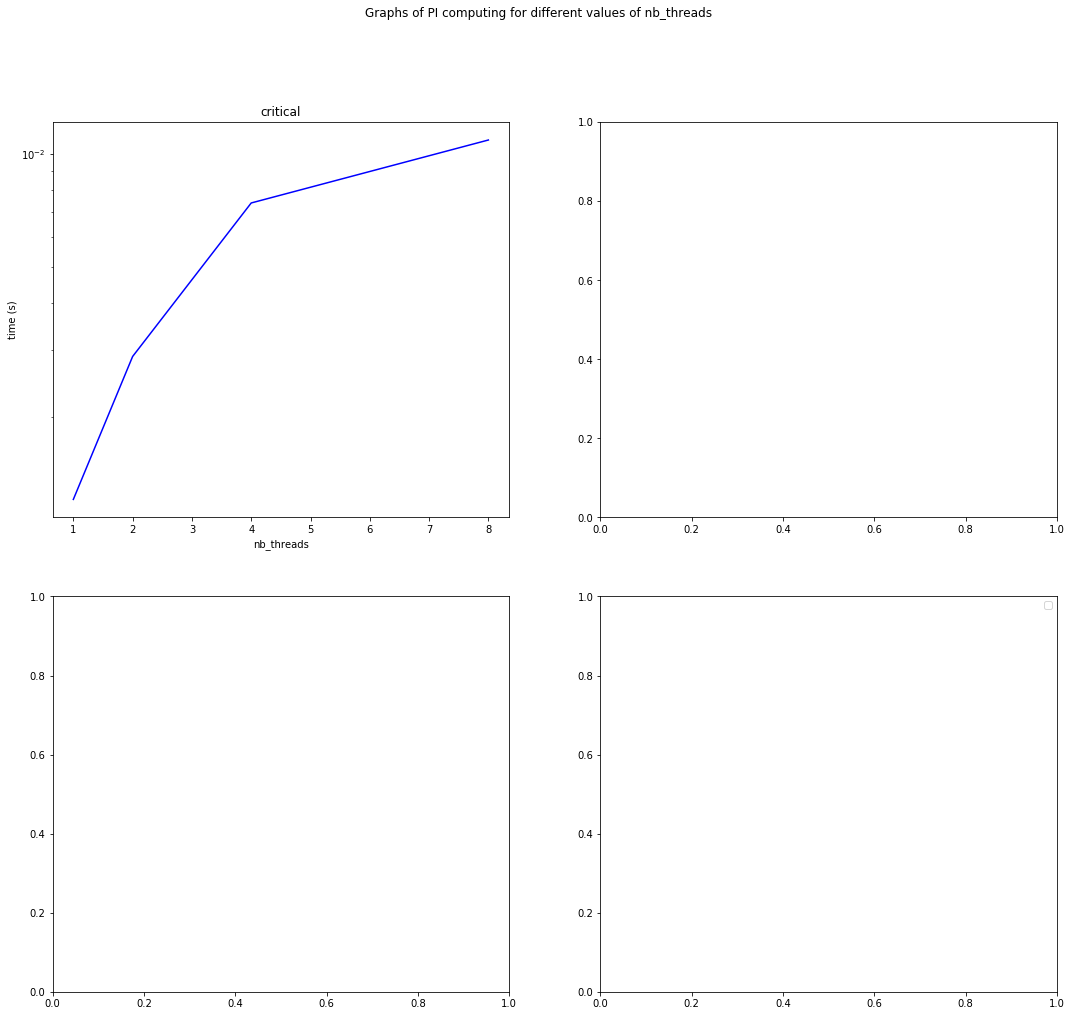

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from numpy import genfromtxt
import itertools
import pandas as pd

import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv(csv_result_file,
    header=0 # line of header
    ,dtype=csv_headers)
display(df.head(10))

# display graphs
fig, axes = plt.subplots(2, 2, figsize=(18,16))
fig.suptitle("Graphs of PI computing for different values of nb_threads")

nb_different_num_steps = len(df['num_steps'].unique())
for i in range(nb_different_num_steps):
    df_plot = df[(df['num_steps'] == int(num_steps))]
    df_plot = df_plot[df_plot['version'] == "atomic"]
    
    mean_stats = df.groupby(['num_steps','version','nb_threads']).mean().reset_index()
    display(mean_stats.head(10))
    
    axes[0][0].plot(mean_stats['nb_threads'], mean_stats['runtime'],linestyle="solid",color=color_num_steps[num_steps])
    axes[0][0].set(yscale="log",xlabel="nb_threads",ylabel="time (s)",title="critical")
    #    plt.gca().legend(("nb_threads","runtime (s)"))
    axes[0][0].scatter(df_plot['nb_threads'], df_plot['runtime'],color=color_num_steps[num_steps])

    # df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "reduce")]
    # mean_stats = df_plot.groupby(['num_steps','version','nb_threads']).mean().reset_index()
    
    # plt.plot(mean_stats['nb_threads'], mean_stats['runtime'],linestyle="dashed",color=color_num_steps[num_steps])
    # plt.yscale('log')
    # plt.xscale('log')
    # plt.scatter(df_plot['nb_threads'], df_plot['runtime'],color=color_num_steps[num_steps])
    
plt.legend()
plt.show()

#### Strong Scaling

### Discussion